In [39]:
# Import necessary libraries
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
from data import load_data
from train import calculate_iou

In [40]:
# Load the trained model
model = smp.Unet(
    encoder_name="mobilenet_v2",  # Example encoder
    encoder_weights="imagenet",
    in_channels=3,
    classes=4,  # Adjust number of classes
)
model.load_state_dict(torch.load('unet_model_trained.pth'))
model.eval()

Unet(
  (encoder): MobileNetV2Encoder(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1

In [41]:
def calculate_ious(predictions, targets):
# Calculate IoU for each category
    head_iou = calculate_iou(predictions, targets, class_value=1)
    flipper_iou = calculate_iou(predictions, targets, class_value=2)
    carapace_iou = calculate_iou(predictions, targets, class_value=3)

    print("head: ", head_iou)
    print("flippers: ", flipper_iou)
    print("carapace: ", carapace_iou)


In [42]:
def display_results(input_image, output_mask, ground_truth_mask):
    plt.figure(figsize=(15, 5))

    # Display the original input image
    plt.subplot(1, 3, 1)
    plt.imshow(input_image)
    plt.title("Original Image")

    # Display the segmentation mask output
    plt.subplot(1, 3, 2)
    plt.imshow(output_mask)
    plt.title("Segmentation Mask")

    # Display the ground truth mask
    plt.subplot(1, 3, 3)
    plt.imshow(ground_truth_mask)
    plt.title("Ground Truth Mask")

    plt.show()

In [43]:
# Define function to predict and visualize the output
def predict(model, test_loader, num_images=5):  
    # Create a list to store random images and labels from the test_loader
    random_images = []
    
    # Extract all batches and pick random images until we get `num_images`
    for batch in test_loader:
        data, targets = batch
        for i in range(len(data)):
            if len(random_images) < num_images:
                random_images.append((data[i], targets[i]))
            else:
                break  # Stop once we have enough images
    
    # Process each selected image
    with torch.no_grad():
        for data, target in random_images:
            # Prepare image for model input
            data = data.unsqueeze(0)  # Add batch dimension
            output = model(data)  # Run the model
            prediction = torch.argmax(output, dim=1)
            
            # Move tensors to CPU for display
            target_np = target.cpu().numpy() 
            data_np = data.squeeze(0).cpu().numpy().transpose(1, 2, 0)  # Convert to [H, W, C]
            prediction_np = prediction.squeeze(0).cpu().numpy()
            
            # Display results
            calculate_ious(prediction, target.unsqueeze(0))  # Assuming calculate_ious can handle single tensors
            display_results(data_np, prediction_np, target_np)  

HELLO GOOOO
2000 x 2000
HELLO GOOOO
2000 x 2000
HELLO GOOOO
2000 x 2000
head:  tensor(0.)
flippers:  tensor(0.)
carapace:  tensor(0.)


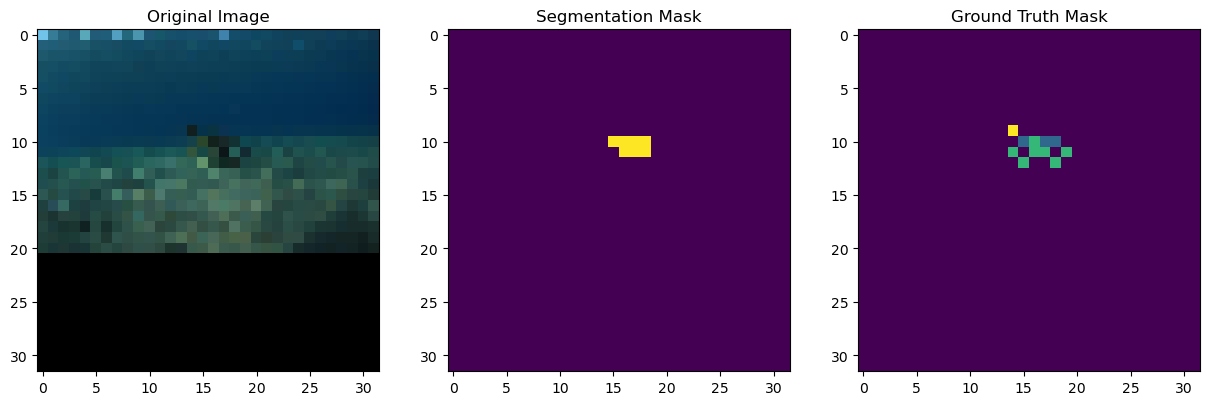

head:  tensor(0.)
flippers:  tensor(0.2000)
carapace:  tensor(0.3000)


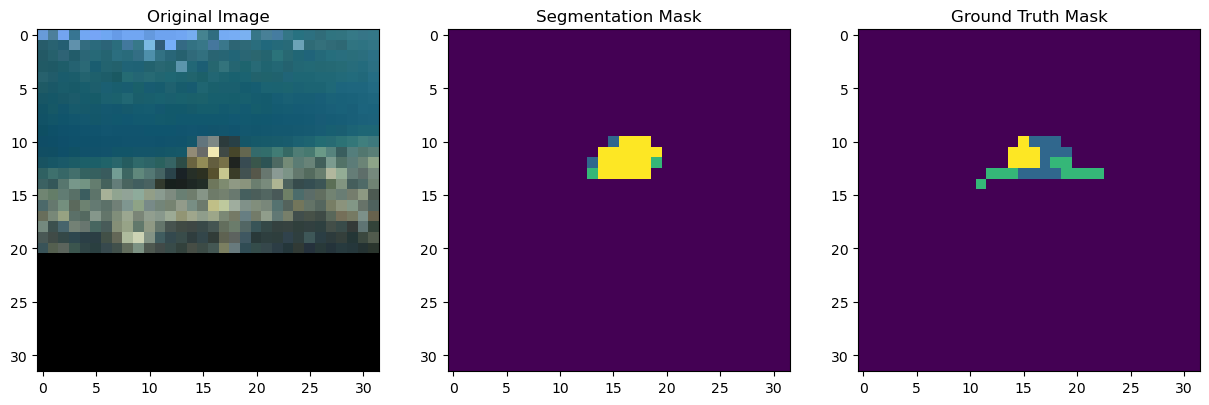

head:  tensor(0.8925)
flippers:  tensor(0.3889)
carapace:  tensor(0.6667)


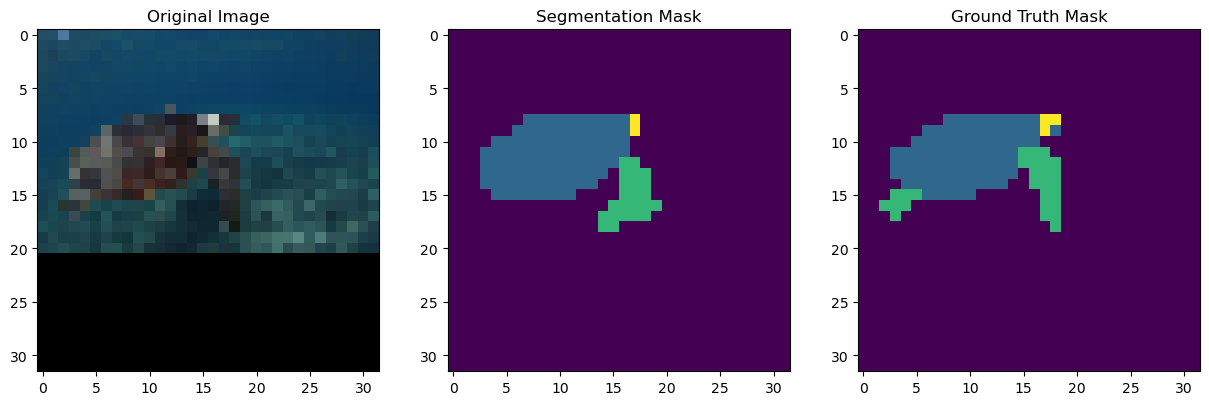

head:  tensor(0.7077)
flippers:  tensor(0.6071)
carapace:  tensor(0.8333)


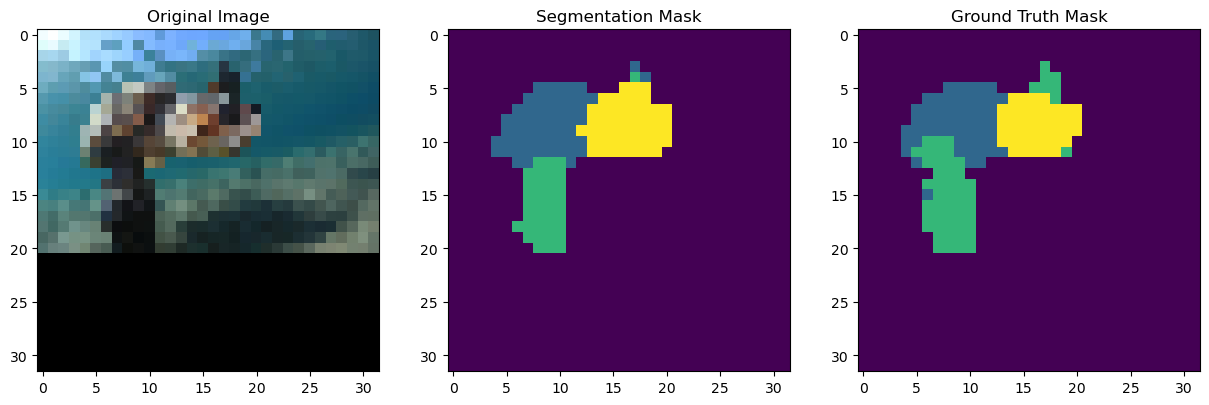

head:  tensor(0.8214)
flippers:  tensor(0.5714)
carapace:  tensor(0.8261)


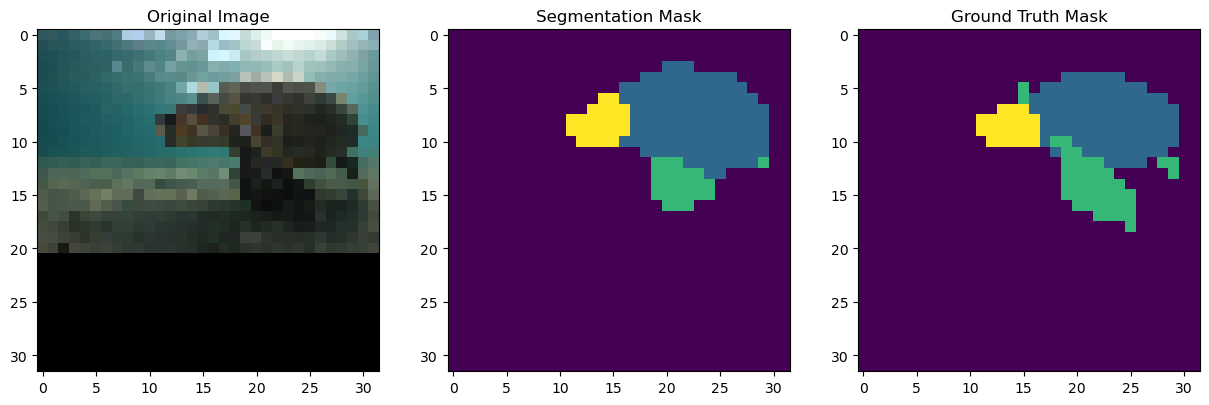

In [44]:
# Run an example
_, _, test_loader = load_data(f"/Users/aryan/Desktop/COMP9517/grp_project/visioneerium/src/unet/dataSet/turtles-data/data/images")
predict(model, test_loader, 5)